In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import folium

In [2]:
df=pd.read_csv("crime.csv")
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [3]:
df.FIRST_OCCURRENCE_DATE=pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df['YEAR']=df.FIRST_OCCURRENCE_DATE.dt.year
df['DAY']=df.FIRST_OCCURRENCE_DATE.dt.day
df['DAY_OF_WEEK']=df.FIRST_OCCURRENCE_DATE.dt.dayofweek
df['MONTH']=df.FIRST_OCCURRENCE_DATE.dt.month
df['HOUR']=df.FIRST_OCCURRENCE_DATE.dt.hour
df.index=pd.DatetimeIndex(df['FIRST_OCCURRENCE_DATE'])

In [4]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,YEAR,DAY,DAY_OF_WEEK,MONTH,HOUR
FIRST_OCCURRENCE_DATE,,,,,,,,,,,,,,,,,,,,,
2016-06-15 23:31:00,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,2016-06-15 23:31:00,NaN,6/15/2016 11:31:00 PM,NaN,...,5,521,montbello,1,0,2016,15,2,6,23
2017-10-11 12:30:00,20186000994,20186000994239900,2399,0,theft-other,larceny,2017-10-11 12:30:00,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,...,5,522,gateway-green-valley-ranch,1,0,2017,11,2,10,12
2016-03-04 20:00:00,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,...,3,314,wellshire,1,0,2016,4,4,3,20
2018-01-30 19:20:00,201872333,201872333239900,2399,0,theft-other,larceny,2018-01-30 19:20:00,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,...,3,312,belcaro,1,0,2018,30,1,1,19
2017-06-22 20:53:00,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,2017-06-22 20:53:00,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,...,3,311,cherry-creek,1,0,2017,22,3,6,20


In [5]:
print("Data is ranging from {} to {}".format(df.index.min(),df.index.max()))

Data is ranging from 2014-01-02 00:00:00 to 2019-07-05 03:00:00


In [31]:
date_before=pd.Timestamp(2019,7,1)
df=df[df.FIRST_OCCURRENCE_DATE<date_before]

**Traffic V/S CRIME**

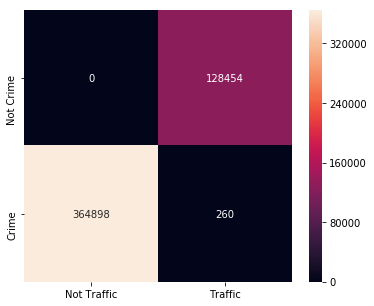

In [7]:
plt.figure(figsize=(6,5))
crime_v_traffic=pd.crosstab(index=df['IS_CRIME'],columns=df['IS_TRAFFIC'])
crime_v_traffic.index=["Not Crime","Crime"]
crime_v_traffic.columns=["Not Traffic","Traffic"]
sns.heatmap(crime_v_traffic, annot=True, fmt="d")

**Offense Category distribution**

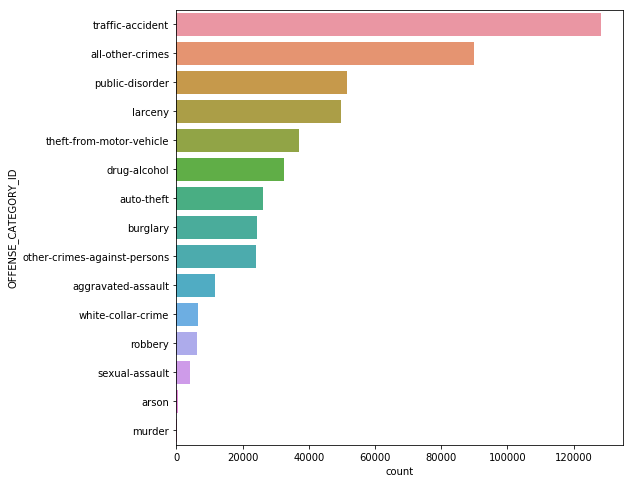

In [8]:
plt.figure(figsize=(8,8))
cat_freq = df.OFFENSE_CATEGORY_ID.value_counts()
sns.countplot(y="OFFENSE_CATEGORY_ID", data=df, order=cat_freq.index)

**Most and least Common Offence**

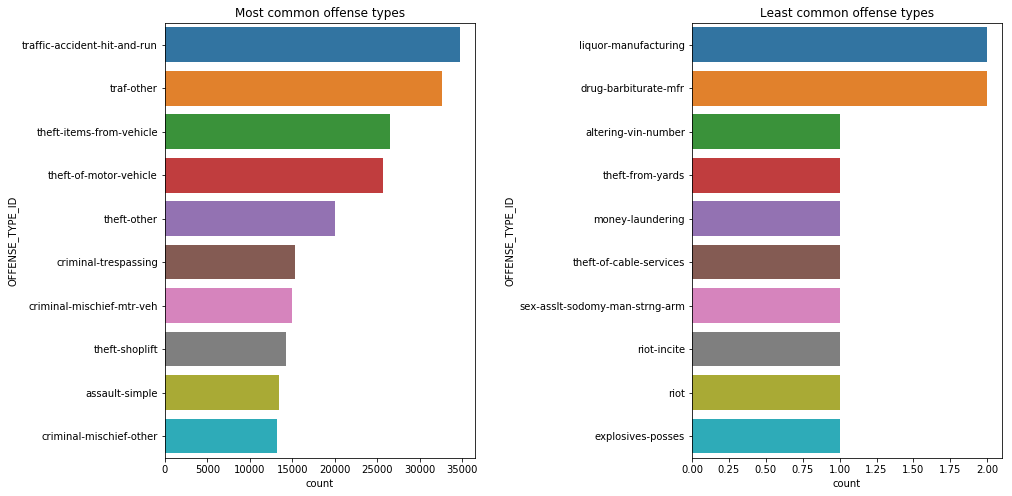

In [9]:
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
type_freq = df.OFFENSE_TYPE_ID.value_counts()
common_types = type_freq.iloc[1:11]
rare_types = type_freq.iloc[-10:]
axes[0].set_title("Most common offense types")
sns.countplot(y="OFFENSE_TYPE_ID", data=df, order=common_types.index, ax=axes[0])
axes[1].set_title("Least common offense types")
sns.countplot(y="OFFENSE_TYPE_ID", data=df, order=rare_types.index, ax=axes[1])

**All Other Crime**

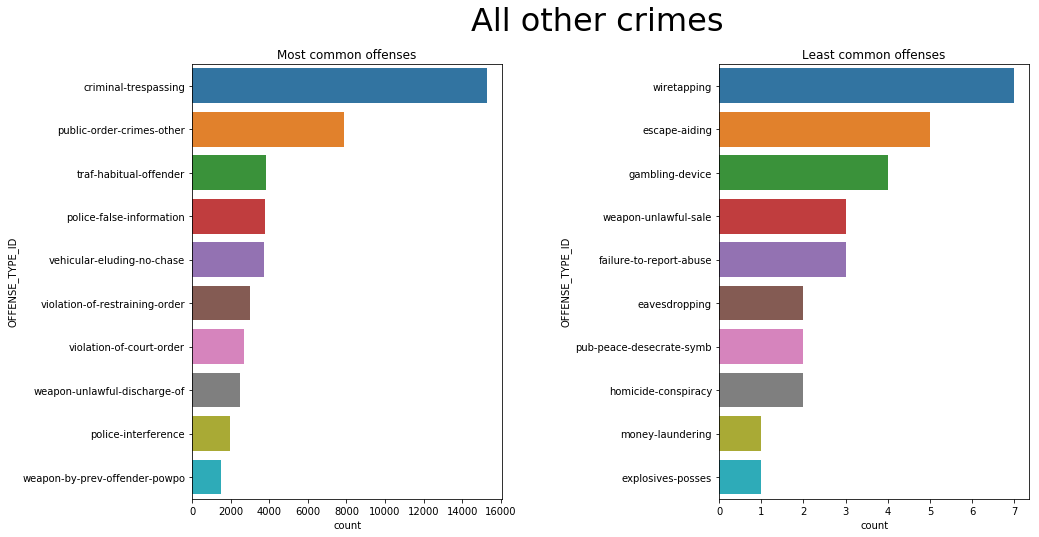

In [10]:
other_crimes = df[df.OFFENSE_CATEGORY_ID == "all-other-crimes"]
other_crimes_freq = other_crimes.OFFENSE_TYPE_ID.value_counts()
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
other_common_types = other_crimes_freq.iloc[1:11]
other_rare_types = other_crimes_freq.iloc[-10:]
f.suptitle("All other crimes", fontsize=32)
axes[0].set_title("Most common offenses")
sns.countplot(y="OFFENSE_TYPE_ID", data=other_crimes, order=other_common_types.index, ax=axes[0])
axes[1].set_title("Least common offenses")
sns.countplot(y="OFFENSE_TYPE_ID", data=other_crimes, order=other_rare_types.index, ax=axes[1])

**** Crime V/s traffic over month****

In [11]:
crimes_df = df[df.IS_CRIME==1]
traffic_df = df[df.IS_TRAFFIC==1]

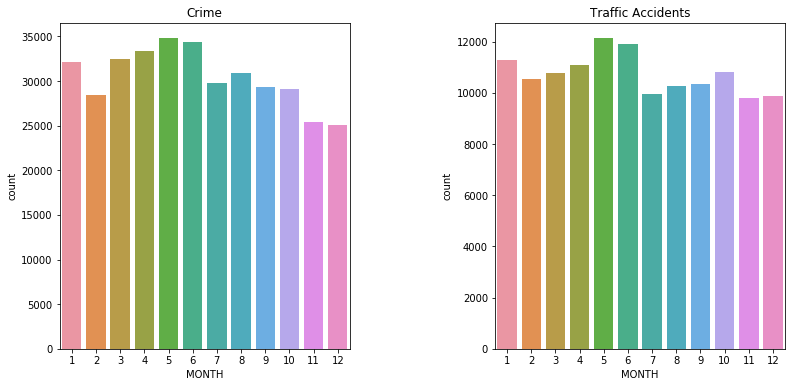

In [12]:
f, axes = plt.subplots(1,2)
f.set_figheight(6)
f.set_figwidth(13)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="MONTH", data=crimes_df, ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="MONTH", data=traffic_df, ax=axes[1])

**Crime V/S traffic per hour**

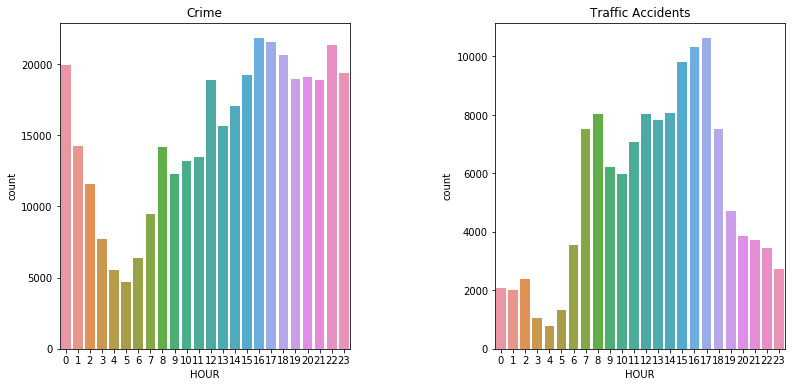

In [13]:
f, axes = plt.subplots(1,2)
f.set_figheight(6)
f.set_figwidth(13)
plt.subplots_adjust(wspace=.5)
axes[0].set_title("Crime")
sns.countplot(x="HOUR", data=crimes_df, ax=axes[0])
axes[1].set_title("Traffic Accidents")
sns.countplot(x="HOUR", data=traffic_df, ax=axes[1])

**Overall trends for crime in denver**

In [14]:
crimes_per_day = pd.DataFrame(crimes_df.resample('D').size())
crimes_per_day["MEAN"] = crimes_df.resample('D').size().mean()
crimes_per_day["STD"] = crimes_df.resample('D').size().std()
UCL = crimes_per_day['MEAN'] + 3 * crimes_per_day['STD']
LCL = crimes_per_day['MEAN'] - 3 * crimes_per_day['STD']

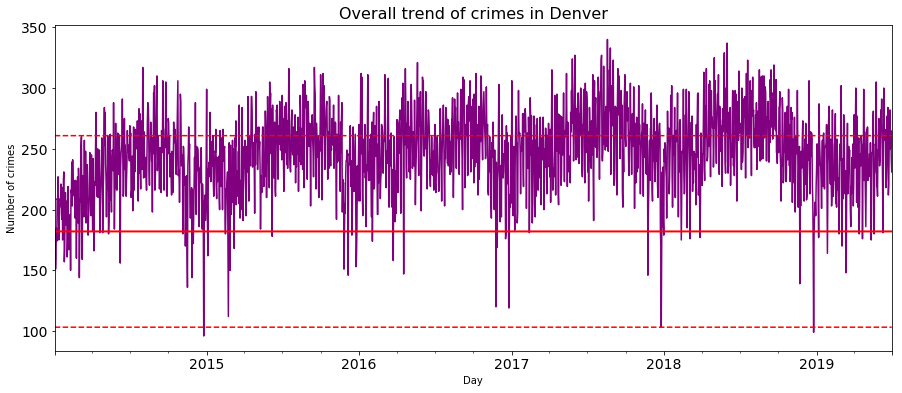

In [15]:
plt.figure(figsize=(15,6))
df.resample('D').size().plot(label='Crimes per day', color='purple')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
crimes_per_day['MEAN'].plot(color='red', linewidth=2, label='Average')
plt.title('Overall trend of crimes in Denver', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)

Text(0.5, 1.0, 'Overall trend of crimes in Denver(by month)')

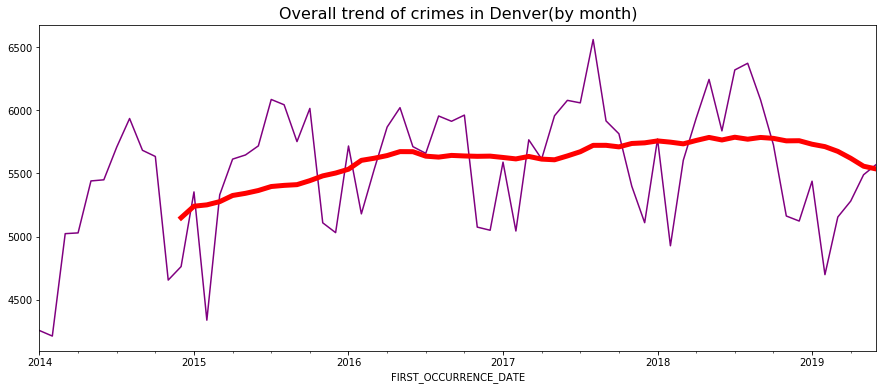

In [16]:
month_df =crimes_df.resample('M').size()
plt.figure(figsize=(15,6))
month_df.plot(label='Total,  accidents per month', color='purple')
month_df.rolling(window=12).mean().plot(color='red', linewidth=5, label='12-Months Average')
plt.title('Overall trend of crimes in Denver(by month)', fontsize=16)

In [17]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2014-02-28 00:00:00: 4211
Worst Month 2017-08-31 00:00:00: 6562


**Most dangerous and safest neighbor**

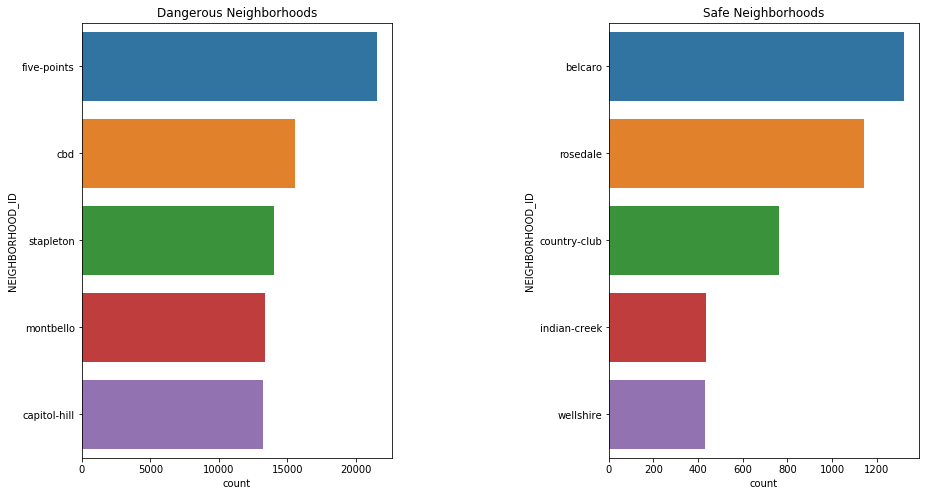

In [18]:
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
neighborhood_freq = crimes_df.NEIGHBORHOOD_ID.value_counts()
dangerous = neighborhood_freq.iloc[:5]
safe = neighborhood_freq.iloc[-5:]
axes[0].set_title("Dangerous Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=crimes_df, order=dangerous.index, ax=axes[0])
axes[1].set_title("Safe Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=crimes_df, order=safe.index, ax=axes[1])

**Dangerous neighbor for ladies**

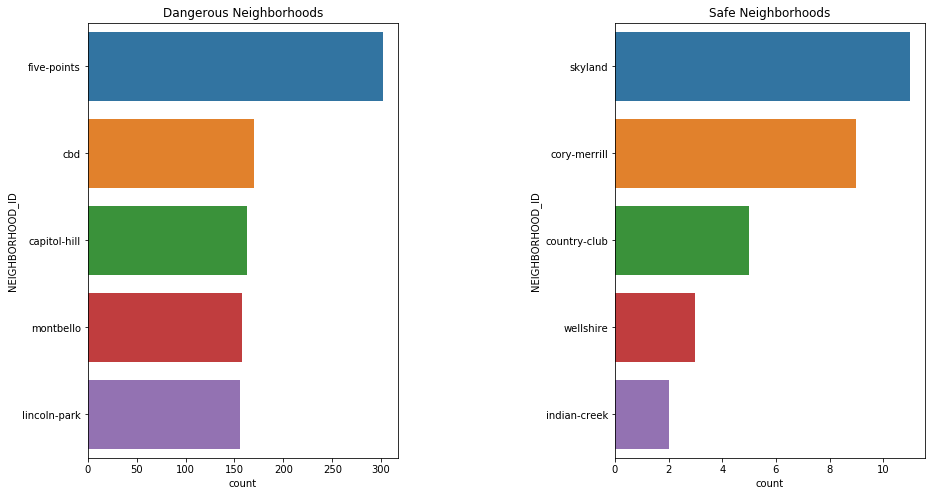

In [19]:
sexual_assault_df = crimes_df[crimes_df.OFFENSE_CATEGORY_ID=="sexual-assault"]
f, axes = plt.subplots(1,2)
f.set_figheight(8)
f.set_figwidth(15)
plt.subplots_adjust(wspace=.7)
neighborhood_freq = sexual_assault_df.NEIGHBORHOOD_ID.value_counts()
dangerous = neighborhood_freq.iloc[:5]
safe = neighborhood_freq.iloc[-5:]
axes[0].set_title("Dangerous Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=sexual_assault_df, order=dangerous.index, ax=axes[0])
axes[1].set_title("Safe Neighborhoods")
sns.countplot(y="NEIGHBORHOOD_ID", data=sexual_assault_df, order=safe.index, ax=axes[1])

**Crimes by weekdays**

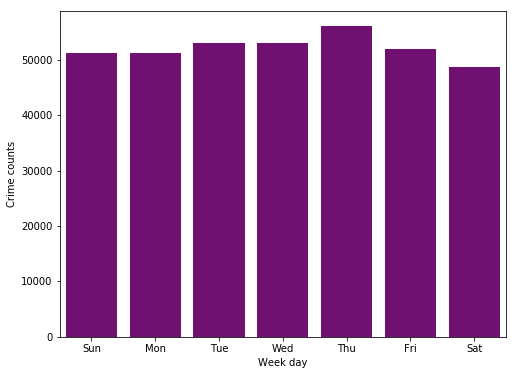

In [20]:
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(crimes_df["DAY_OF_WEEK"].value_counts()).sort_index()
week_df["DAY"] = weekdays
week_df.columns = ["Crime counts", "Week day"]
plt.figure(figsize=(8,6))
sns.barplot(x="Week day", y="Crime counts", color="purple", data=week_df)

**Average number of crimes per hour**

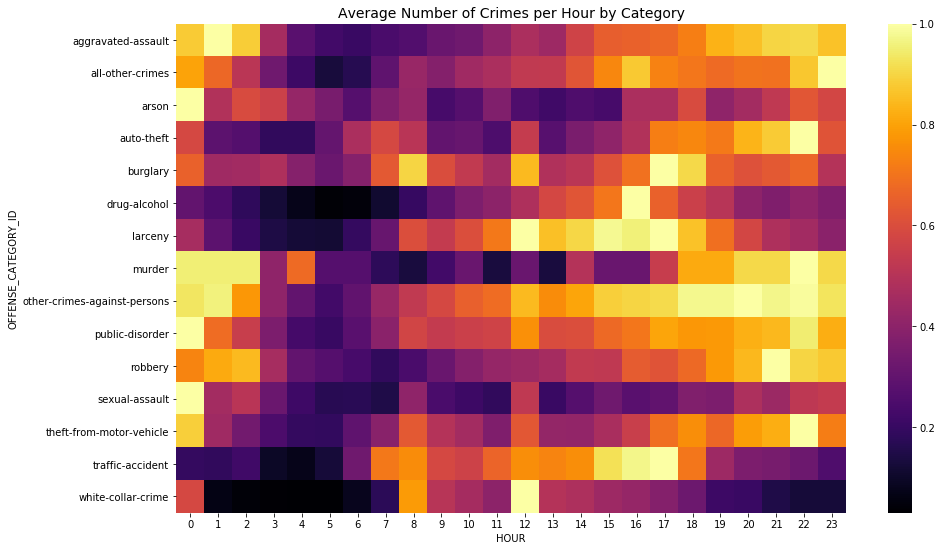

In [21]:
crimes_hour_pt = df.pivot_table(index='OFFENSE_CATEGORY_ID', columns='HOUR', aggfunc='size')
crimes_hour_pt = crimes_hour_pt.apply(lambda x: x / crimes_hour_pt.max(axis=1))
plt.figure(figsize=(15,9))
plt.title('Average Number of Crimes per Hour by Category', fontsize=14)
sns.heatmap(crimes_hour_pt, cmap='inferno', cbar=True, annot=False, fmt=".0f");

**Average number of crimes per **

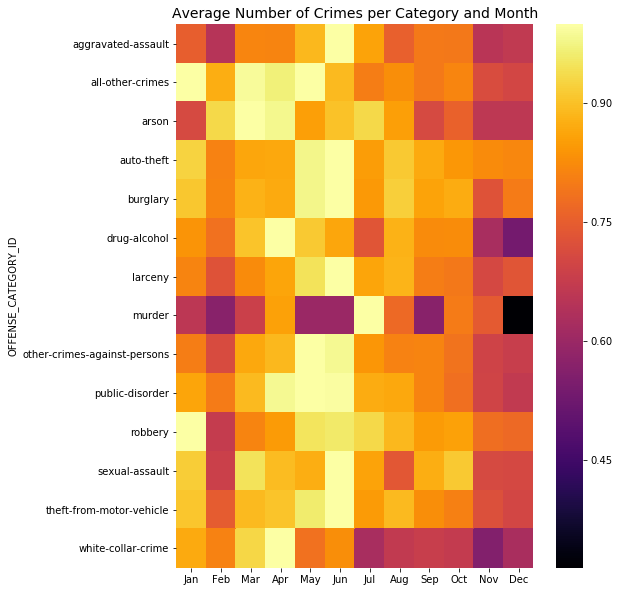

In [22]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crimes_pt = crimes_df.pivot_table(index='OFFENSE_CATEGORY_ID', columns='MONTH', aggfunc='size')
crimes_scaled = crimes_pt.apply(lambda x: x / crimes_pt.max(axis=1))
crimes_scaled.columns = months
plt.figure(figsize=(8,10))
plt.title('Average Number of Crimes per Category and Month', fontsize=14)
sns.heatmap(crimes_scaled, cmap='inferno', cbar=True, annot=False, fmt=".0f")

**Which day has the highest or lowest average number of crimes?**

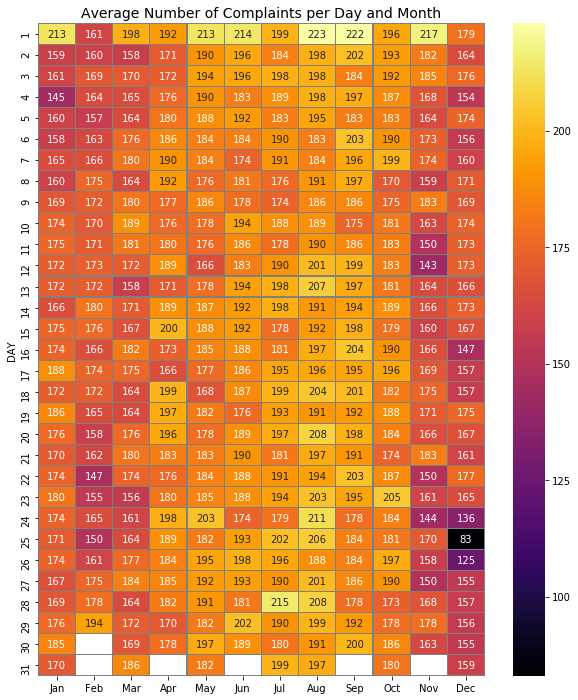

In [32]:
crimes_pt = crimes_df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
crimes_pt_year_count = crimes_df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
crimes_avg = crimes_pt / crimes_pt_year_count
crimes_avg.columns = months
plt.figure(figsize=(10,12))
plt.title('Average Number of Complaints per Day and Month', fontsize=14)
sns.heatmap(crimes_avg.round(), cmap='inferno', linecolor='grey',linewidths=0.1, cbar=True, annot=True, fmt=".0f")

In [30]:
crimes_df = crimes_df.dropna(subset=['GEO_LAT', 'GEO_LON'])

In [25]:
robbery_df = crimes_df[(crimes_df.OFFENSE_CATEGORY_ID=='robbery') & (crimes_df.YEAR==2019)]

In [26]:
denver_map = folium.Map(location=[39.72378, -104.899157],
                       zoom_start=12,
                       tiles="CartoDB dark_matter")

In [27]:
for i in range(len(robbery_df)):
    lat = robbery_df.iloc[i]['GEO_LAT']
    long = robbery_df.iloc[i]['GEO_LON']
    popup_text = """Neighborhood: {}<br>
                    Date Occurred: {}<br>""".format(crimes_df.iloc[i]['NEIGHBORHOOD_ID'],
                                               crimes_df.iloc[i]['FIRST_OCCURRENCE_DATE'])
    folium.CircleMarker(location=[lat, long], popup=popup_text, radius=8, color='#800080', fill=True).add_to(denver_map)

**2019 Denver Map**

In [28]:
denver_map